# Divergence

This code calculates both the KL divergence and Jensen-Shannon divergence between the data distributions of different clients and plots the results using heatmaps. The darker regions indicate higher divergence values, suggesting more significant differences between data distributions.

Please note that in real-world scenarios, you should replace the simulated data (data_clients) with actual data from your clients. Additionally, you might want to adjust the number of bins for histogram calculations (bins) and consider applying smoothing or kernel density estimation for more accurate density estimation.

Remember that divergence values are relative, and their interpretation depends on your data and problem domain. Higher divergence values indicate greater dissimilarity between data distributions.

C:\Users\kdmen\AppData\Local\Temp\ipykernel_20588\110008879.py:8: RuntimeWarning: invalid value encountered in divide
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
C:\Users\kdmen\AppData\Local\Temp\ipykernel_20588\110008879.py:8: RuntimeWarning: divide by zero encountered in divide
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
C:\Users\kdmen\AppData\Local\Temp\ipykernel_20588\110008879.py:8: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
C:\Users\kdmen\AppData\Local\Temp\ipykernel_20588\110008879.py:8: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


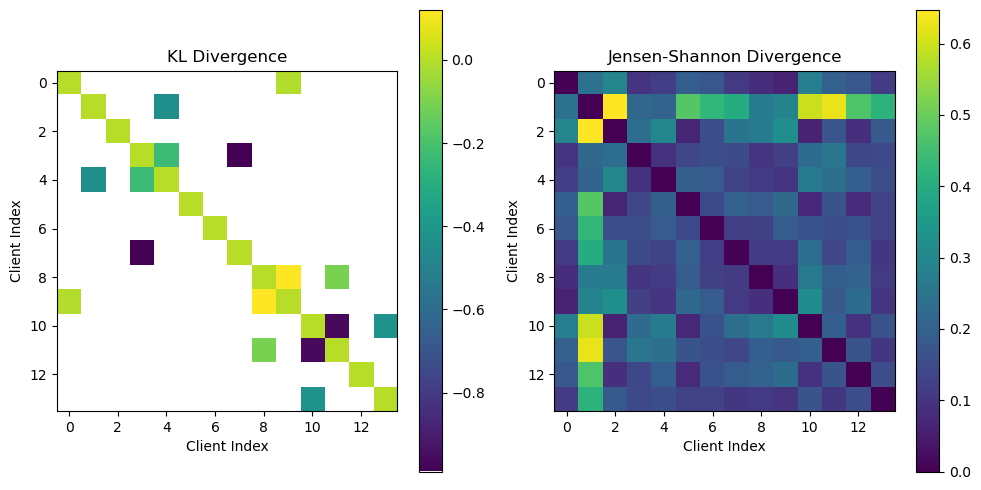

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated data distributions for illustration
data_clients = [np.random.normal(loc=i, scale=1, size=1000) for i in range(1, 15)]

def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

def jensen_shannon_divergence(p, q):
    m = 0.5 * (p + q)
    return 0.5 * (kl_divergence(p, m) + kl_divergence(q, m))

num_clients = len(data_clients)
kl_matrix = np.zeros((num_clients, num_clients))
js_matrix = np.zeros((num_clients, num_clients))

for i in range(num_clients):
    for j in range(i, num_clients):
        p = np.histogram(data_clients[i], bins=50, density=True)[0]
        q = np.histogram(data_clients[j], bins=50, density=True)[0]
        kl_matrix[i, j] = kl_divergence(p, q)
        js_matrix[i, j] = jensen_shannon_divergence(p, q)
        kl_matrix[j, i] = kl_matrix[i, j]
        js_matrix[j, i] = js_matrix[i, j]

# Plot KL Divergence
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(kl_matrix, cmap='viridis')
plt.colorbar()
plt.title('KL Divergence')
plt.xlabel('Client Index')
plt.ylabel('Client Index')

# Plot Jensen-Shannon Divergence
plt.subplot(1, 2, 2)
plt.imshow(js_matrix, cmap='viridis')
plt.colorbar()
plt.title('Jensen-Shannon Divergence')
plt.xlabel('Client Index')
plt.ylabel('Client Index')

plt.tight_layout()
plt.show()


> Handling The Above Warnings:

The most common reason for encountering invalid values in the KL divergence calculation is when one or both of the arrays p_nonzero and q_nonzero contain zeros. In the context of KL divergence, the logarithm of zero is undefined and can lead to the invalid value encountered in multiply warning.

To handle this situation, you can add a small epsilon value to the arrays before performing the computation. This is a common technique used to stabilize the calculation and avoid division by zero or taking the logarithm of zero.

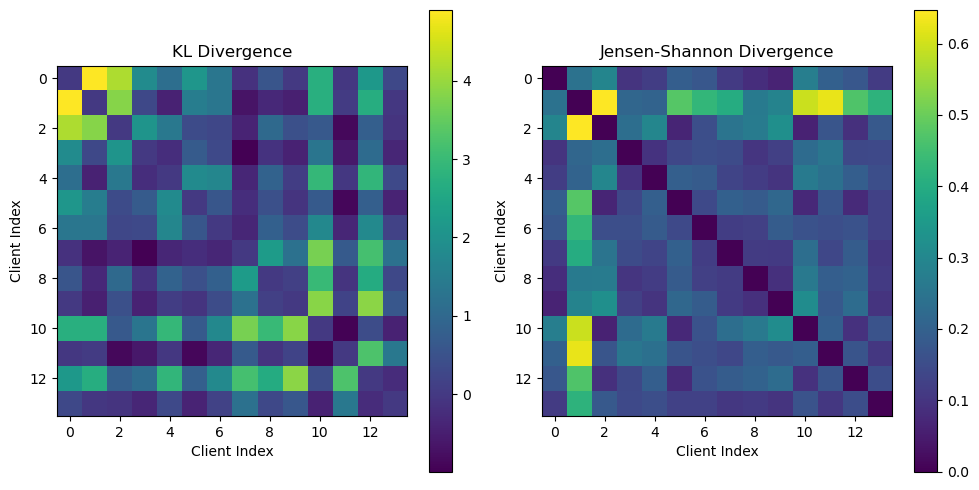

In [3]:
def kl_divergence(p, q, epsilon=1e-8):
    p_nonzero = np.nan_to_num(p)
    q_nonzero = np.nan_to_num(q)
    
    # Add epsilon to prevent division by zero or logarithm of zero
    p_nonzero += epsilon
    q_nonzero += epsilon
    
    return np.sum(p_nonzero * np.log(p_nonzero / q_nonzero))

# Simulated data distributions for illustration
#data_clients = [np.random.normal(loc=i, scale=1, size=1000) for i in range(1, 15)]

#def kl_divergence(p, q):
#    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

def jensen_shannon_divergence(p, q):
    m = 0.5 * (p + q)
    return 0.5 * (kl_divergence(p, m) + kl_divergence(q, m))

num_clients = len(data_clients)
kl_matrix = np.zeros((num_clients, num_clients))
js_matrix = np.zeros((num_clients, num_clients))

for i in range(num_clients):
    for j in range(i, num_clients):
        p = np.histogram(data_clients[i], bins=50, density=True)[0]
        q = np.histogram(data_clients[j], bins=50, density=True)[0]
        
        #kl_matrix[i, j] = kl_divergence(p, q)
        #kl_matrix[j, i] = kl_matrix[i, j]
        kl_matrix[i, j] = kl_divergence(p, q)
        kl_matrix[j, i] = kl_matrix[i, j]

        js_matrix[i, j] = jensen_shannon_divergence(p, q)
        js_matrix[j, i] = js_matrix[i, j]

# Plot KL Divergence
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(kl_matrix, cmap='viridis')
plt.colorbar()
plt.title('KL Divergence')
plt.xlabel('Client Index')
plt.ylabel('Client Index')

# Plot Jensen-Shannon Divergence
plt.subplot(1, 2, 2)
plt.imshow(js_matrix, cmap='viridis')
plt.colorbar()
plt.title('Jensen-Shannon Divergence')
plt.xlabel('Client Index')
plt.ylabel('Client Index')

plt.tight_layout()
plt.show()


Applying This Code To My Data

In [8]:
num_clients = 14
data_clients2 = [0]*num_clients
base_data_path = 'C:\\Users\\kdmen\\Desktop\\Research\\personalization-privacy-risk\\Data\\Client_Specific_Files\\'
condition_number = 0

for i in range(num_clients):
    samples_path = base_data_path + "UserID" + str(i) + "_TrainData_8by20770by64.npy"
    #labels_path = base_data_path + "UserID" + str(i) + "_Labels_8by20770by2.npy" 
    with open(samples_path, 'rb') as handle:
        samples_npy = np.load(handle)
    #with open(labels_path, 'rb') as handle:
    #    labels_npy = np.load(handle)
    # Select for given condition #THIS IS THE ACTUAL TRAINING DATA AND LABELS FOR THE GIVEN TRIAL
    cond_samples_npy = samples_npy[condition_number,:,:]
    #cond_labels_npy = labels_npy[self.condition_number,:,:]
    
    data_clients2[i] = cond_samples_npy

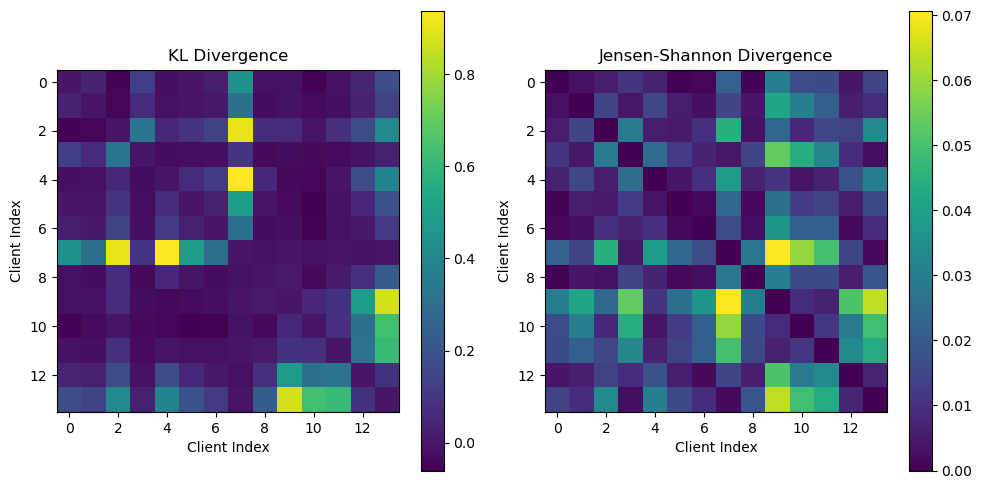

In [9]:
num_clients = len(data_clients2)
kl_matrix = np.zeros((num_clients, num_clients))
js_matrix = np.zeros((num_clients, num_clients))

for i in range(num_clients):
    for j in range(i, num_clients):
        p = np.histogram(data_clients2[i], bins=50, density=True)[0]
        q = np.histogram(data_clients2[j], bins=50, density=True)[0]
        
        #kl_matrix[i, j] = kl_divergence(p, q)
        #kl_matrix[j, i] = kl_matrix[i, j]
        kl_matrix[i, j] = kl_divergence(p, q)
        kl_matrix[j, i] = kl_matrix[i, j]

        js_matrix[i, j] = jensen_shannon_divergence(p, q)
        js_matrix[j, i] = js_matrix[i, j]

# Plot KL Divergence
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(kl_matrix, cmap='viridis')
plt.colorbar()
plt.title('KL Divergence')
plt.xlabel('Client Index')
plt.ylabel('Client Index')

# Plot Jensen-Shannon Divergence
plt.subplot(1, 2, 2)
plt.imshow(js_matrix, cmap='viridis')
plt.colorbar()
plt.title('Jensen-Shannon Divergence')
plt.xlabel('Client Index')
plt.ylabel('Client Index')

plt.tight_layout()
plt.show()


# Clustering

C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


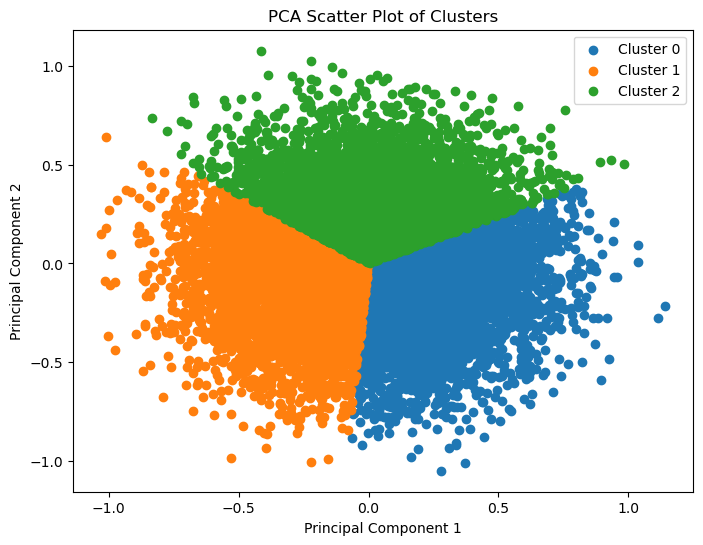

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Simulated data with shape 1000x64
data_clients = [np.random.rand(1000, 64) for _ in range(14)]

# Flatten data for clustering
flattened_data = np.vstack(data_clients)

# Perform PCA for dimensionality reduction
n_components = 2  # Number of principal components
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(flattened_data)

# Perform KMeans clustering
n_clusters = 3  # Number of clusters
n_init = 10  # Explicitly set n_init to suppress the warning
kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=0)
cluster_labels = kmeans.fit_predict(pca_data)

# Scatter plot visualization
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    cluster_points = pca_data[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

plt.title('PCA Scatter Plot of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


Q: What if I know my clients require 7 comps to get 95% of their variance? Should I switch to n=7? If so, how would I plot?

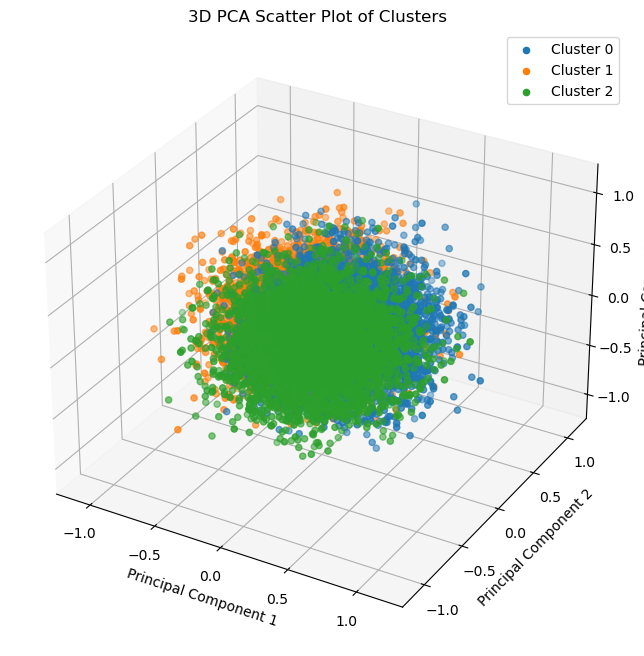

In [11]:
from mpl_toolkits.mplot3d import Axes3D

flattened_data = np.vstack(data_clients)

# Perform PCA with 7 principal components
n_components = 7  # Number of principal components
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(flattened_data)

# Perform KMeans clustering
n_clusters = 3  # Number of clusters
n_init = 10  # Explicitly set n_init to suppress the warning
kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=0)
cluster_labels = kmeans.fit_predict(pca_data)

# 3D scatter plot visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in range(n_clusters):
    cluster_points = pca_data[cluster_labels == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {i}')

ax.set_title('3D PCA Scatter Plot of Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()


Hmm idk. Applying to my own data:

C:\Users\kdmen\miniconda3\envs\fl_torch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


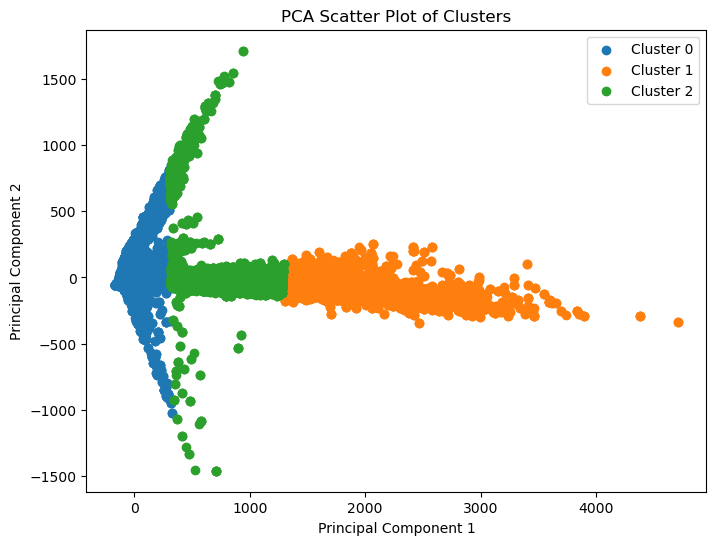

In [12]:
# Flatten data for clustering
flattened_data = np.vstack(data_clients2)

# Perform PCA for dimensionality reduction
n_components = 2  # Number of principal components
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(flattened_data)

# Perform KMeans clustering
n_clusters = 3  # Number of clusters
n_init = 10  # Explicitly set n_init to suppress the warning
kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=0)
cluster_labels = kmeans.fit_predict(pca_data)

# Scatter plot visualization
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    cluster_points = pca_data[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

plt.title('PCA Scatter Plot of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


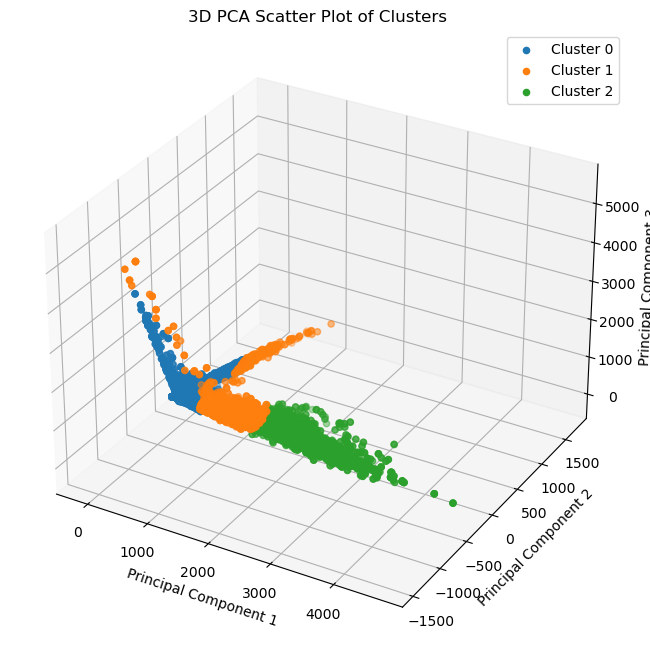

In [14]:
from mpl_toolkits.mplot3d import Axes3D

flattened_data = np.vstack(data_clients2)

# Perform PCA with 7 principal components
n_components = 7  # Number of principal components
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(flattened_data)

# Perform KMeans clustering
n_clusters = 3  # Number of clusters
n_init = 10  # Explicitly set n_init to suppress the warning
kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=0)
cluster_labels = kmeans.fit_predict(pca_data)

# 3D scatter plot visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in range(n_clusters):
    cluster_points = pca_data[cluster_labels == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {i}')

ax.set_title('3D PCA Scatter Plot of Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from umap import UMAP  # Make sure you have the umap-learn library installed

# Simulated data with shape 1000x64
data_clients = [np.random.rand(1000, 64) for _ in range(14)]

# Flatten data for clustering
flattened_data = np.vstack(data_clients)

# Perform UMAP dimensionality reduction
n_components = 2  # Number of components
umap = UMAP(n_components=n_components)
umap_data = umap.fit_transform(flattened_data)

# Perform KMeans clustering
n_clusters = 3  # Number of clusters
n_init = 10  # Explicitly set n_init to suppress the warning
kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=0)
cluster_labels = kmeans.fit_predict(umap_data)

# Scatter plot visualization
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    cluster_points = umap_data[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

plt.title('UMAP Scatter Plot of Clusters')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'umap'

Apply standard scaler before doing PCA

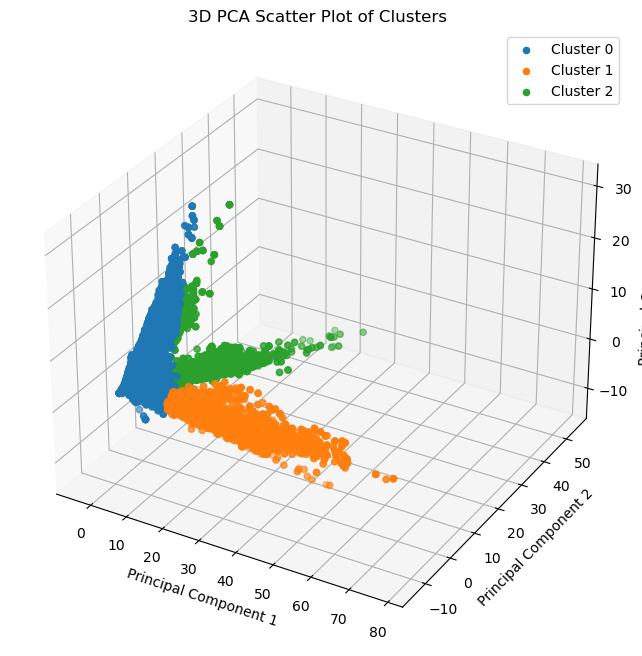

In [39]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Simulated data with shape 1000x64
#data_clients = [np.random.rand(1000, 64) for _ in range(14)]

# Flatten data for PCA
flattened_data = np.vstack(data_clients2)
# Normalize data using StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(flattened_data)
# Perform PCA on normalized data
n_components = 3  # Number of principal components
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(normalized_data)
# Perform KMeans clustering
n_clusters = 3  # Number of clusters
n_init = 10  # Explicitly set n_init to suppress the warning
kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=0)
cluster_labels = kmeans.fit_predict(pca_data)
# 3D scatter plot visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in range(n_clusters):
    cluster_points = pca_data[cluster_labels == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {i}')
ax.set_title('3D PCA Scatter Plot of Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()


Running the same code as above but with n=10 components. I think since I am plotting in 3D, I am only plotting the first 3 components, so I'm not sure that raising n actually helps me since I'm not visualizing those other components. Maybe it actually even hurts me since I'm letting it use an additional 7 components to explain variance that I'm not even able to plot?

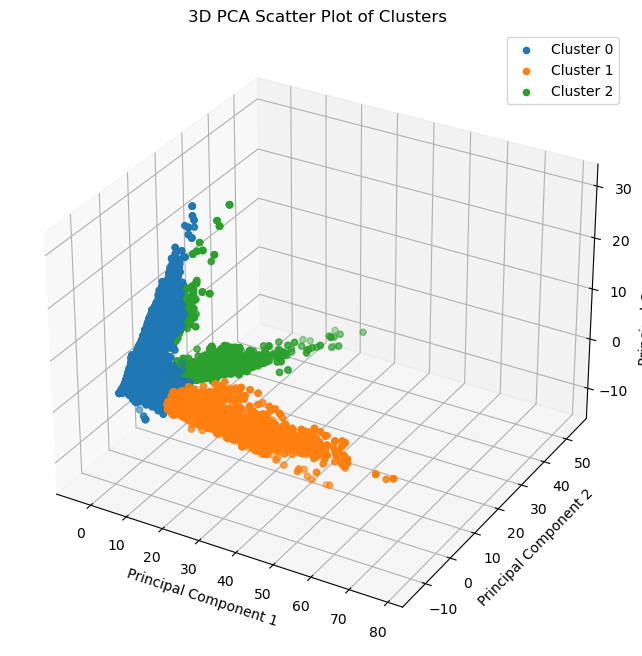

In [40]:
# Flatten data for PCA
flattened_data = np.vstack(data_clients2)
# Normalize data using StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(flattened_data)
# Perform PCA on normalized data
n_components = 10  # Number of principal components
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(normalized_data)
# Perform KMeans clustering
n_clusters = 3  # Number of clusters
n_init = 10  # Explicitly set n_init to suppress the warning
kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=0)
cluster_labels = kmeans.fit_predict(pca_data)
# 3D scatter plot visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in range(n_clusters):
    cluster_points = pca_data[cluster_labels == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {i}')
ax.set_title('3D PCA Scatter Plot of Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

# Inter- And Intra-Subject Variability

In [ ]:
import numpy as np
from scipy.stats import gaussian_kde, wasserstein_distance
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

In this code, we first estimate the PDF of each client's data using Gaussian Kernel Density Estimation (gaussian_kde from scipy.stats). We then calculate the Wasserstein distances between pairs of PDFs using the wasserstein_distance function from scipy.stats.

Next, we use KMeans clustering on the calculated Wasserstein distances to cluster the clients' PDFs. Finally, we visualize the clustering results in a scatter plot.

Please note that this example uses synthetic data for demonstration purposes. You should replace data_clients with your actual data. Also, depending on your data and task, you may need to adjust hyperparameters, such as the number of clusters, the bandwidth parameter for KDE, and others, to achieve meaningful clustering results.

In [ ]:
# Simulated data with shape 1000x64
data_clients = [np.random.randn(1000, 64) for _ in range(14)]

# Estimate PDFs using Gaussian Kernel Density Estimation (KDE)
pdfs = []
for client_data in data_clients:
    kde = gaussian_kde(client_data.T)
    pdfs.append(kde)

# Calculate Wasserstein distances between PDFs
n_clients = len(pdfs)
wasserstein_distances = np.zeros((n_clients, n_clients))
for i in range(n_clients):
    for j in range(i+1, n_clients):
        distance = wasserstein_distance(pdfs[i](client_data), pdfs[j](client_data))
        wasserstein_distances[i, j] = distance
        wasserstein_distances[j, i] = distance

# Perform KMeans clustering on Wasserstein distances
n_clusters = 3  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(wasserstein_distances)

# Scatter plot visualization
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    cluster_indices = np.where(cluster_labels == i)[0]
    plt.scatter(cluster_indices, [i] * len(cluster_indices), label=f'Cluster {i}')

plt.title('Clustering of Client PDFs using Wasserstein Distance')
plt.xlabel('Client Index')
plt.ylabel('Cluster Label')
plt.legend()
plt.show()


Let's say I have 8 trials per client, and I have 14 clients. Each dataset is 1000x64, and therefore I have 8x14 = 112 datasets of size 1000x64. Could you write code that measure the inter-subject variability (e.g. the statistical heterogeneity between clients) as well as the intra-subject variability (e.g. the statistical heterogeneity within a given client, in this case between each client's 8 trials)? After you write this code, please explain what it does, explain pros and cons, and potential ways to improve it or alternative methods

Mean Inter-Subject Distance: 332.2883911071918
Mean Intra-Subject Distance: 110.73128348839846


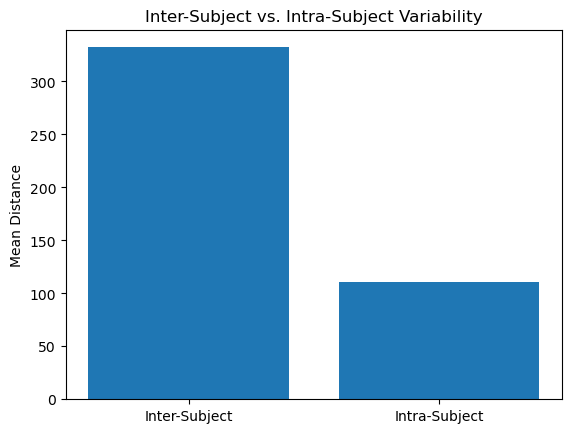

In [18]:
# Simulated data with shape 1000x64
data_clients = [np.random.randn(1000, 64) for _ in range(14)]
n_clients = len(data_clients)
n_trials = 8

# Flatten data for easy computation
flattened_data = np.vstack(data_clients)

# Reshape data to separate trials for each client
reshaped_data = flattened_data.reshape(n_clients, n_trials, -1)

# Measure inter-subject variability using pairwise distances between clients
inter_subject_distances = pairwise_distances(reshaped_data.reshape(n_clients, -1))

# Measure intra-subject variability for each client's trials
intra_subject_distances = np.zeros((n_clients, n_trials, n_trials))
for i in range(n_clients):
    intra_subject_distances[i] = pairwise_distances(reshaped_data[i])

# Calculate mean distances for inter-subject and intra-subject variability
mean_inter_subject_distance = np.mean(inter_subject_distances)
mean_intra_subject_distance = np.mean(intra_subject_distances)

print(f"Mean Inter-Subject Distance: {mean_inter_subject_distance}")
print(f"Mean Intra-Subject Distance: {mean_intra_subject_distance}")

plt.bar(["Inter-Subject", "Intra-Subject"], [mean_inter_subject_distance, mean_intra_subject_distance])
plt.ylabel("Mean Distance")
plt.title("Inter-Subject vs. Intra-Subject Variability")
plt.show()

Mean Inter-Subject Distance: 52128.96814805465
Mean Intra-Subject Distance: 13326.099075677152


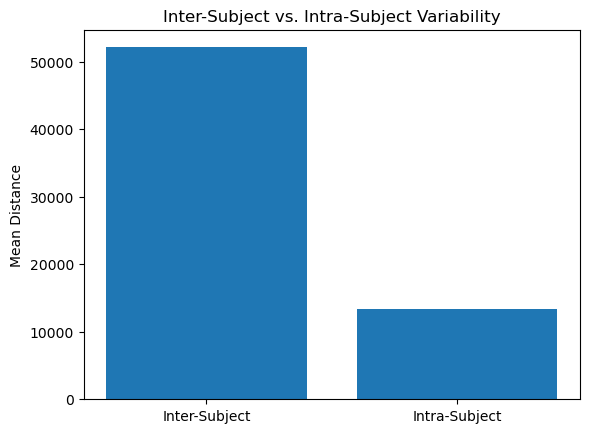

In [19]:
# Simulated data with shape 1000x64
#data_clients = [np.random.randn(1000, 64) for _ in range(14)]
n_clients = len(data_clients2)
n_trials = 8

# Flatten data for easy computation
flattened_data = np.vstack(data_clients2)

# Reshape data to separate trials for each client
reshaped_data = flattened_data.reshape(n_clients, n_trials, -1)

# Measure inter-subject variability using pairwise distances between clients
inter_subject_distances = pairwise_distances(reshaped_data.reshape(n_clients, -1))

# Measure intra-subject variability for each client's trials
intra_subject_distances = np.zeros((n_clients, n_trials, n_trials))
for i in range(n_clients):
    intra_subject_distances[i] = pairwise_distances(reshaped_data[i])

# Calculate mean distances for inter-subject and intra-subject variability
mean_inter_subject_distance = np.mean(inter_subject_distances)
mean_intra_subject_distance = np.mean(intra_subject_distances)

print(f"Mean Inter-Subject Distance: {mean_inter_subject_distance}")
print(f"Mean Intra-Subject Distance: {mean_intra_subject_distance}")

plt.bar(["Inter-Subject", "Intra-Subject"], [mean_inter_subject_distance, mean_intra_subject_distance])
plt.ylabel("Mean Distance")
plt.title("Inter-Subject vs. Intra-Subject Variability")
plt.show()

Explanation:
- The code simulates the data for 14 clients, each with 8 trials of shape 1000x64.
- The data is flattened for easy computation and then reshaped to separate trials for each client.
- For inter-subject variability, pairwise distances are calculated between all pairs of clients. This measures the variability between clients' trial data.
- For intra-subject variability, pairwise distances are calculated for each client's trials separately. This measures the variability within each client's data.
- The mean distances for inter-subject and intra-subject variability are calculated and printed.

Pros:
- Inter-Subject Variability: Measures how different clients' trial data are from each other, which can indicate the overall variability or diversity among clients.
- Intra-Subject Variability: Measures the variability within a client's trials, helping to understand the consistency or stability of a client's data.

Cons:
- Sensitivity to Data Variance: Variability metrics can be sensitive to the scale and variance of the data, and may not fully capture complex relationships.

Improvements and Alternatives:
- To improve robustness, consider using other distance metrics such as Mahalanobis distance that account for covariance.
- Utilize dimensionality reduction techniques (e.g., PCA, UMAP) before computing distances to reduce noise and computational complexity.
- Explore statistical tests or indices (e.g., F-statistic, coefficient of variation) that quantify variability in a more interpretable manner.
- For inter-subject variability, consider clustering methods to identify distinct groups of clients based on their trial data.

## Group Differences
- The variability between clients might suggest that there are different groups or clusters of clients with distinct trial data patterns.

In this code, we calculate pairwise distances between clients' trial data and perform hierarchical clustering using the linkage function from scipy.cluster.hierarchy. The resulting dendrogram visually represents the grouping of clients based on their trial data patterns.

Interpretation:
- The dendrogram illustrates how clients are grouped together based on their similarity in trial data patterns.
- The vertical axis represents the distance between clusters. Longer vertical lines indicate larger dissimilarities between groups.
- The horizontal axis represents client indices.

Pros:
- Pattern Identification: Hierarchical clustering helps identify natural groupings or clusters of clients based on trial data patterns.
- Visualization: The dendrogram provides a visual representation of the hierarchical relationships between groups.

Cons:
- Sensitivity to Distance Metric: The choice of distance metric can affect the clustering results. Experiment with different distance metrics to find the most suitable one for your data.
- Interpretation Complexity: Interpreting the dendrogram can be challenging, especially when dealing with a large number of clients.

Alternative Methods:
- K-Means Clustering: K-Means is a popular method that partitions clients into a predefined number of clusters. It can work well when the number of clusters is known.
- DBSCAN: Density-Based Spatial Clustering of Applications with Noise can identify clusters of varying shapes and sizes based on density.

C:\Users\kdmen\AppData\Local\Temp\ipykernel_20588\3440009614.py:25: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(inter_subject_distances, method='average')


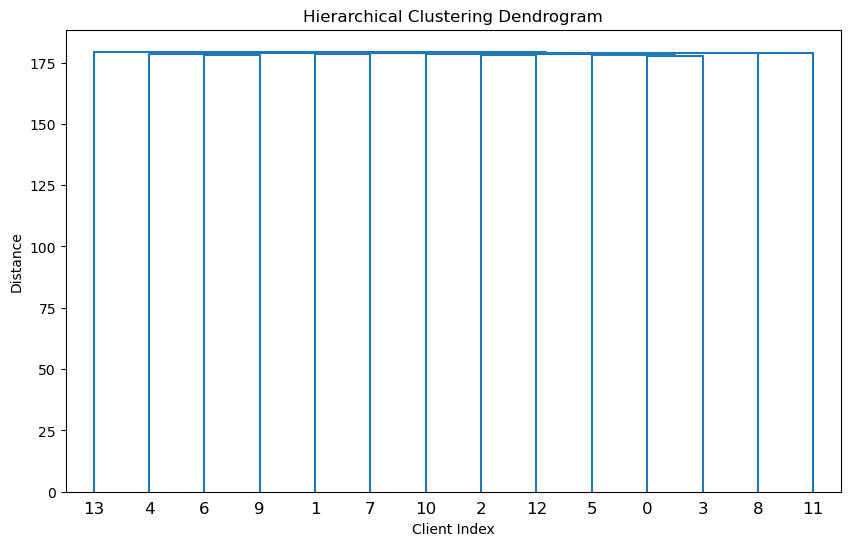

In [20]:
# Simulated data with shape 1000x64
data_clients = [np.random.randn(1000, 64) for _ in range(14)]
n_clients = len(data_clients)
n_trials = 8

# Flatten data for easy computation
flattened_data = np.vstack(data_clients)

# Reshape data to separate trials for each client
reshaped_data = flattened_data.reshape(n_clients, n_trials, -1)

# Calculate pairwise distances between clients' trial data
inter_subject_distances = np.zeros((n_clients, n_clients))
for i in range(n_clients):
    for j in range(i + 1, n_clients):
        distance = np.mean(np.linalg.norm(reshaped_data[i] - reshaped_data[j], axis=1))
        inter_subject_distances[i, j] = distance
        inter_subject_distances[j, i] = distance

# Perform hierarchical clustering
linkage_matrix = linkage(inter_subject_distances, method='average')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=np.arange(n_clients))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Client Index")
plt.ylabel("Distance")
plt.show()


C:\Users\kdmen\AppData\Local\Temp\ipykernel_20588\2553325869.py:21: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix1 = linkage(inter_subject_distances1, method='average')


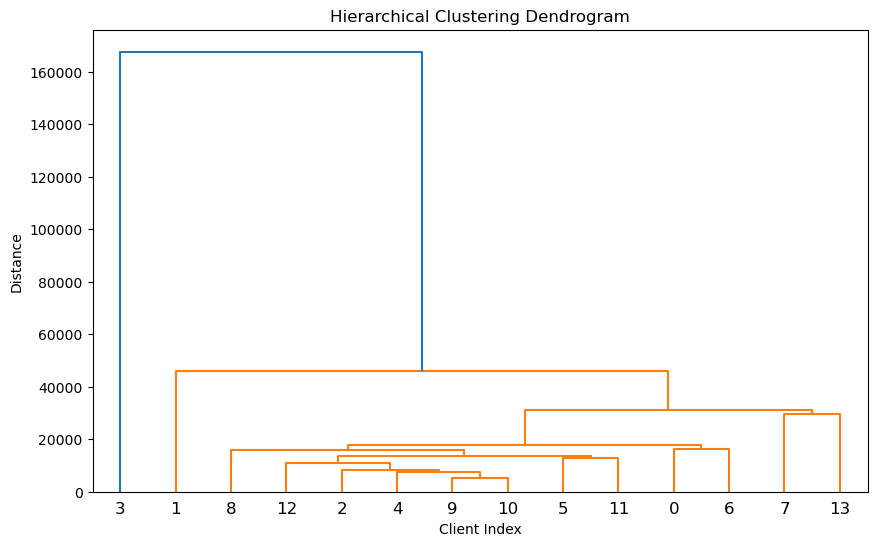

In [26]:
# Simulated data with shape 1000x64
#data_clients = [np.random.randn(1000, 64) for _ in range(14)]
n_clients = len(data_clients2)
n_trials = 8

# Flatten data for easy computation
flattened_data = np.vstack(data_clients2)

# Reshape data to separate trials for each client
reshaped_data = flattened_data.reshape(n_clients, n_trials, -1)

# Calculate pairwise distances between clients' trial data
inter_subject_distances1 = np.zeros((n_clients, n_clients))
for i in range(n_clients):
    for j in range(i + 1, n_clients):
        distance = np.mean(np.linalg.norm(reshaped_data[i] - reshaped_data[j], axis=1))
        inter_subject_distances1[i, j] = distance
        inter_subject_distances1[j, i] = distance

# Perform hierarchical clustering
linkage_matrix1 = linkage(inter_subject_distances1, method='average')

#print("inter_subject_distances1")
#print(inter_subject_distances1)
#print()
#print("linkage_matrix1")
#print(linkage_matrix1)

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix1, labels=np.arange(n_clients))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Client Index")
plt.ylabel("Distance")
plt.show()


The warning you're encountering, ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix, indicates that the input matrix provided to the linkage function of the scipy.cluster.hierarchy module might be in a format that resembles a distance matrix, but it's not a proper condensed distance matrix.

To resolve this issue, you need to provide the linkage function with a condensed distance matrix. A condensed distance matrix is a 1D array that stores the upper triangle of the distance matrix in row-major order, excluding the diagonal.

Here's how you can convert your inter_subject_distances matrix into a condensed distance matrix before using it with the linkage function:

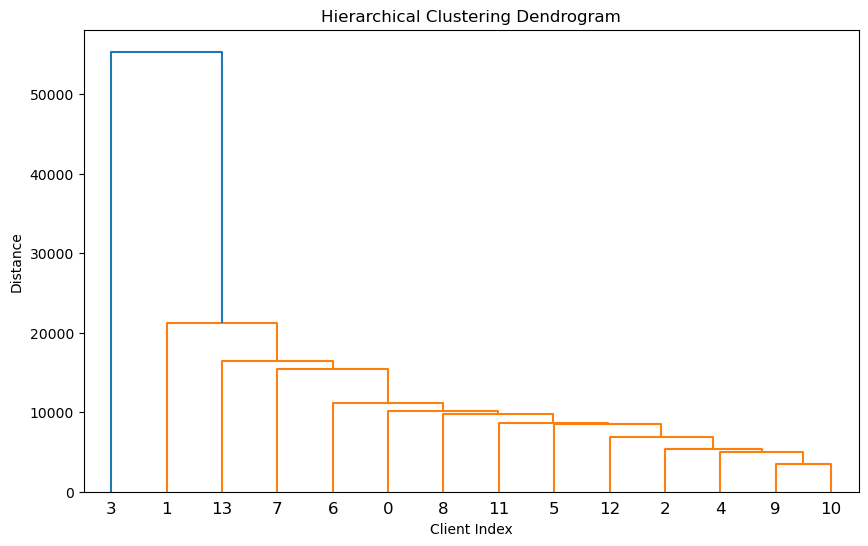

In [27]:
# Simulated data with shape 1000x64
#data_clients = [np.random.randn(1000, 64) for _ in range(14)]
n_clients = len(data_clients2)
n_trials = 8

# Flatten data for easy computation
flattened_data = np.vstack(data_clients2)

# Reshape data to separate trials for each client
reshaped_data = flattened_data.reshape(n_clients, n_trials, -1)

# Calculate pairwise distances between clients' trial data
inter_subject_distances2 = np.zeros((n_clients, n_clients))
for i in range(n_clients):
    for j in range(i + 1, n_clients):
        distance = np.mean(np.linalg.norm(reshaped_data[i] - reshaped_data[j], axis=1))
        inter_subject_distances2[i, j] = distance
        inter_subject_distances2[j, i] = distance
        
# Convert inter-subject distances to a condensed distance matrix
condensed_distances = squareform(inter_subject_distances2)
# Perform hierarchical clustering
linkage_matrix2 = linkage(condensed_distances, method='average')

#print("inter_subject_distances2")
#print(inter_subject_distances2)
#print()
#print("linkage_matrix2")
#print(linkage_matrix2)

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix2, labels=np.arange(n_clients))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Client Index")
plt.ylabel("Distance")
plt.show()

The change in the output from a deep nested hierarchy to only 2 branches is likely due to the way you're calculating and providing the distances for hierarchical clustering. When converting your inter_subject_distances matrix to a condensed distance matrix using squareform, you might inadvertently alter the structure of the distances, resulting in a different clustering arrangement.

The hierarchical clustering algorithm, particularly the method='average' linkage method, is sensitive to the arrangement of distances. Using a condensed distance matrix that doesn't accurately represent the relationships between the data points can lead to unexpected clustering results.

To better understand and troubleshoot the issue, consider the following steps:

Inspect Data: Examine the contents of your original inter_subject_distances matrix to ensure that it accurately represents the distances between all pairs of clients' trial data.

Check Data Transformation: Review any data transformations you're performing on the distances before feeding them into the linkage function. Ensure that these transformations are preserving the pairwise distances properly.

Adjust Distance Metric: If your data distances have changed, you might need to experiment with different distance metrics or linkage methods within the linkage function to achieve the desired hierarchical structure.

Test Different Parameters: Try different settings and parameters within the hierarchical clustering algorithm to see how they affect the resulting dendrogram.

Check Matrix Shape: Ensure that the shape of the condensed distance matrix after using squareform is consistent with what the linkage function expects.

In [28]:
print("Difference between inter_subject_distances1 and inter_subject_distances1: ")
print(inter_subject_distances1 - inter_subject_distances2)
print()
print("Difference between linkage_matrix1 and linkage_matrix2: ")
print(linkage_matrix1 - linkage_matrix2)

Difference between inter_subject_distances1 and inter_subject_distances1: 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Difference between linkage_matrix1 and linkage_matrix2: 
[[ 0.00000000e+00  0.00000000e+00  1.63215648e+03  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.56018007e+03  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.91284593e+03  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  

How should I interpret the output from this approach being different from using KL Divergence? Running our earlier KL Divergence code showed that clients 8 and 14 differed the most from other clients, but these hierarchical plots show that, while 8 and 14 are still similar to each other and far from the others, client 4 is now actually the least similar and by a wide margin

ChatGPT

The difference in results between using hierarchical clustering and KL Divergence for clustering can be attributed to the different approaches and underlying assumptions of these methods.

Hierarchical Clustering:
- Hierarchical clustering focuses on grouping data points based on their pairwise distances or similarities. The hierarchical dendrogram visually represents how data points are grouped into clusters at different levels of similarity. When you observe differences in the hierarchical clustering results, it indicates that the algorithm is emphasizing different patterns of similarity or dissimilarity compared to the KL Divergence approach.
- In your case, the change in the hierarchical clustering dendrogram could be due to variations in how the hierarchical clustering algorithm measures distances or forms clusters. It might also be influenced by the choice of linkage method (e.g., 'average', 'complete', 'ward', etc.).

KL Divergence:
- KL Divergence quantifies the difference between probability distributions. When applied to your case, it measures the dissimilarity between the probability distributions of clients' data. The results from KL Divergence provide insights into how much the data distributions deviate from each other.
- The finding that clients 8 and 14 differed the most using KL Divergence indicates that their data distributions are distinct compared to others in terms of the features being analyzed. This suggests that the data from clients 8 and 14 have unique patterns or characteristics that set them apart.

Interpreting the Differences:
- The discrepancy between hierarchical clustering and KL Divergence results highlights the complexity of data analysis and clustering. Different methods can emphasize different aspects of the data, leading to variations in cluster assignments or groupings.

It's important to consider the following when interpreting the differences:
- __Methodological Differences__: Hierarchical clustering and KL Divergence have different underlying principles and measures. Variations in results are expected due to their distinct approaches.
- __Data Characteristics__: The behavior of clustering methods can be influenced by the specific characteristics of your data. Variations might occur based on data distribution, noise, or dimensionality.
- __Domain Knowledge__: Consider your domain knowledge and research objectives. Which method aligns better with your understanding of the data and the goals of your analysis?
- __Validation__: It's advisable to validate clustering results using domain-specific criteria, external benchmarks, or additional analysis techniques to gain a comprehensive understanding of the data's structure.

Next Steps:
To reconcile the differences and gain deeper insights, you could explore the following:
- Investigate the properties of the data distributions that contribute to the differences between clients using KL Divergence.
- Experiment with different linkage methods and distance metrics in hierarchical clustering to explore how they affect the grouping of clients.
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
    - single
    - complete
    - average
    - weighted
    - centroid
    - median
    - ward
- Consider using multiple clustering methods and validation techniques to assess the robustness and reliability of your results.

In summary, differences in clustering results between hierarchical clustering and KL Divergence underscore the importance of considering multiple analysis methods and their implications when interpreting findings.

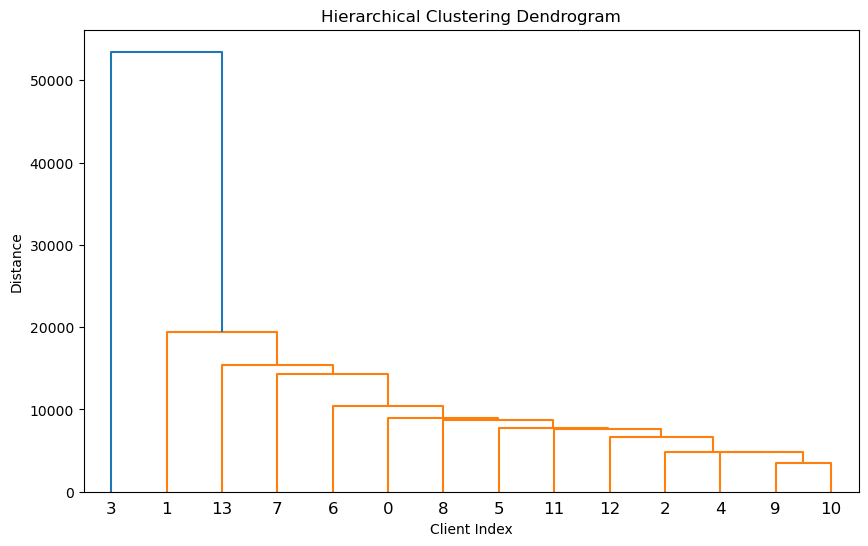

In [30]:
# Simulated data with shape 1000x64
#data_clients = [np.random.randn(1000, 64) for _ in range(14)]
n_clients = len(data_clients2)
n_trials = 8
# Flatten data for easy computation
flattened_data = np.vstack(data_clients2)
# Reshape data to separate trials for each client
reshaped_data = flattened_data.reshape(n_clients, n_trials, -1)
# Calculate pairwise distances between clients' trial data
inter_subject_distances = np.zeros((n_clients, n_clients))
for i in range(n_clients):
    for j in range(i + 1, n_clients):
        distance = np.mean(np.linalg.norm(reshaped_data[i] - reshaped_data[j], axis=1))
        inter_subject_distances[i, j] = distance
        inter_subject_distances[j, i] = distance
# Convert inter-subject distances to a condensed distance matrix
condensed_distances = squareform(inter_subject_distances)
# Nothing above this line will change for the rest of the runs!
#######################################################################

# Perform hierarchical clustering
linkage_matrix_single = linkage(condensed_distances, method='single')
# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix_single, labels=np.arange(n_clients))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Client Index")
plt.ylabel("Distance")
plt.show()

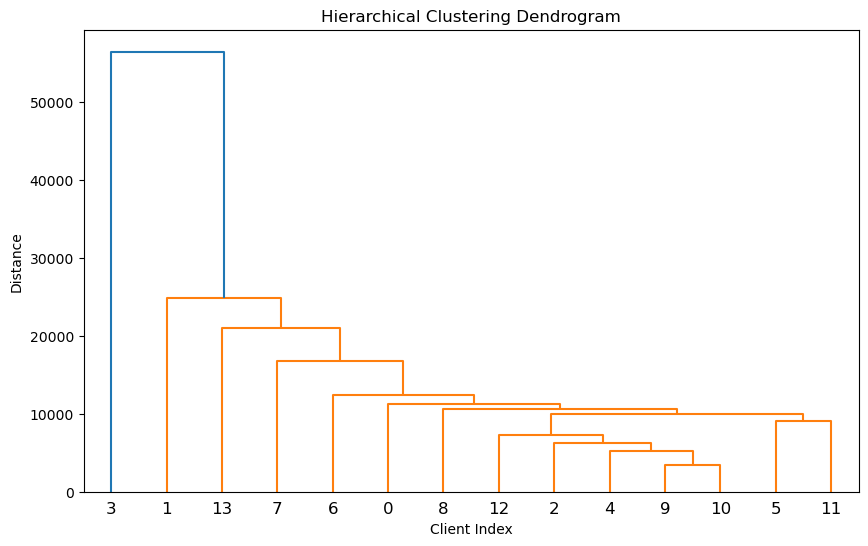

In [31]:
# Convert inter-subject distances to a condensed distance matrix
condensed_distances = squareform(inter_subject_distances)
# Perform hierarchical clustering
linkage_matrix_complete = linkage(condensed_distances, method='complete')
# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix_complete, labels=np.arange(n_clients))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Client Index")
plt.ylabel("Distance")
plt.show()

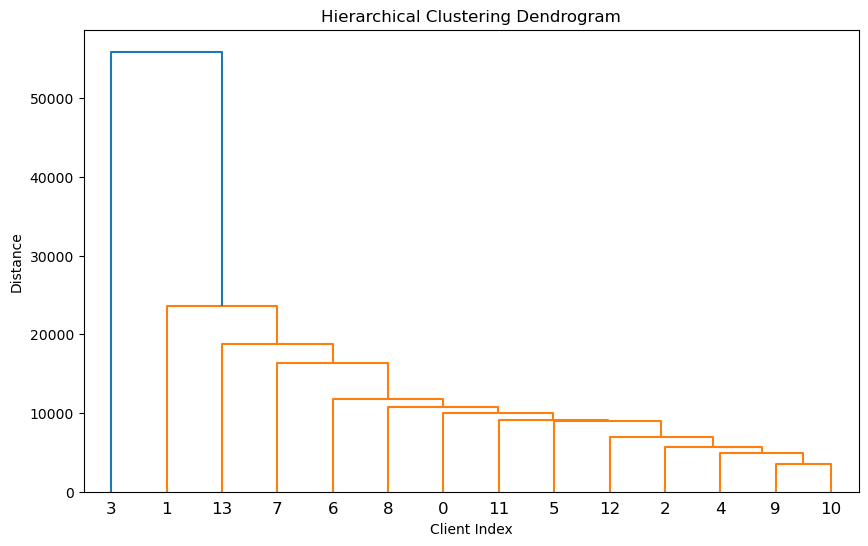

In [32]:

# Perform hierarchical clustering
linkage_matrix_weighted = linkage(condensed_distances, method='weighted')
# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix_weighted, labels=np.arange(n_clients))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Client Index")
plt.ylabel("Distance")
plt.show()

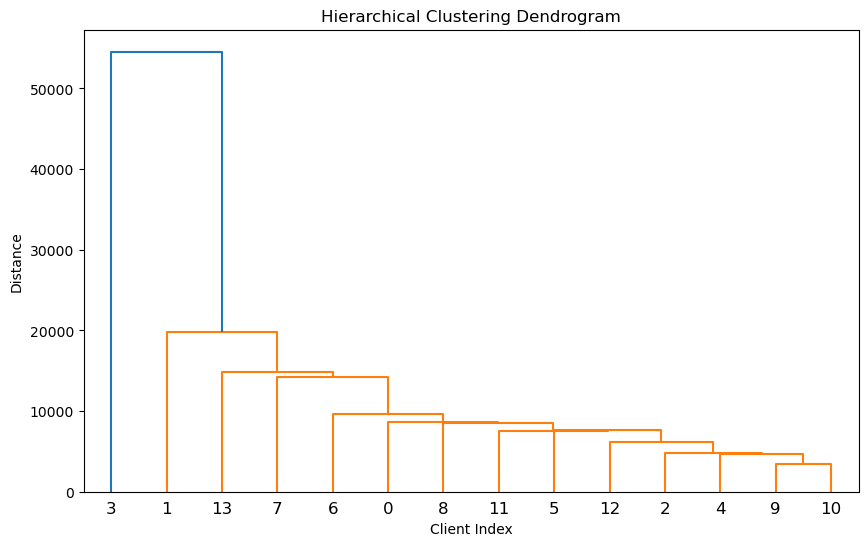

In [33]:

# Perform hierarchical clustering
linkage_matrix_centroid = linkage(condensed_distances, method='centroid')
# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix_centroid, labels=np.arange(n_clients))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Client Index")
plt.ylabel("Distance")
plt.show()

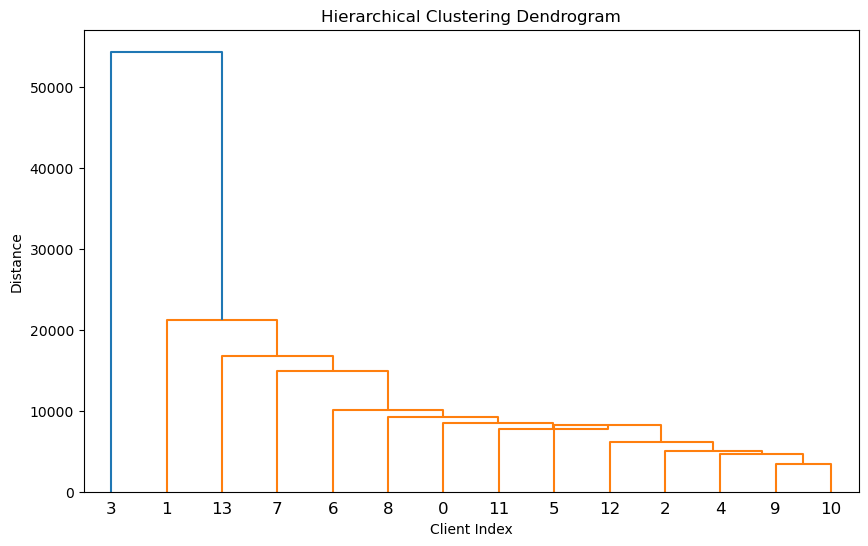

In [34]:

# Perform hierarchical clustering
linkage_matrix_median = linkage(condensed_distances, method='median')
# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix_median, labels=np.arange(n_clients))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Client Index")
plt.ylabel("Distance")
plt.show()

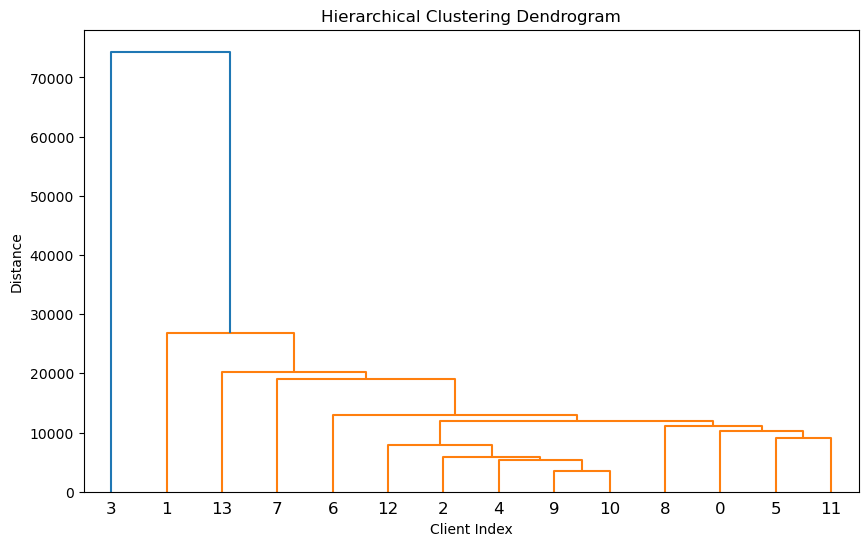

In [35]:

# Perform hierarchical clustering
linkage_matrix_ward = linkage(condensed_distances, method='ward')
# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix_ward, labels=np.arange(n_clients))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Client Index")
plt.ylabel("Distance")
plt.show()

1. Investigate Data Distributions Using KL Divergence:
- Analyze the KL Divergence values for clients 8, 14, and 4 that you obtained previously. Examine the features or dimensions that contribute to the highest divergence values.
- Compare the probability distributions of clients 8, 14, and 4 with those of other clients. Identify specific characteristics or patterns that differentiate these clients in terms of their data distributions.

2. Experiment with Different Hierarchical Clustering Parameters:
- Vary the linkage methods (e.g., 'average', 'complete', 'ward', etc.) in the linkage function to see how they impact the hierarchical clustering results.
- Explore different distance metrics (e.g., Euclidean, Manhattan, etc.) to measure pairwise distances between clients' trial data.
- Adjust the parameters of the clustering algorithm, such as the number of clusters or the clustering threshold, to observe their effects on the dendrogram.

3. Consider Multiple Clustering Methods and Validation:
- Implement alternative clustering algorithms such as K-Means, DBSCAN, or Gaussian Mixture Models (GMM) and compare their results to hierarchical clustering and KL Divergence.
- Apply silhouette analysis or other clustering validation metrics to assess the quality of clusters generated by different methods.
- Utilize domain-specific knowledge or benchmarks (if available) to validate the meaningfulness of identified clusters.

4. Visualize Data and Clustering Results:
- Create visualizations that illustrate the distributions of features for clients 8, 14, and 4. Compare these distributions to those of other clients.
- Visualize the clusters identified by different clustering methods using scatter plots, heatmaps, or other visualization techniques.
- Overlay the results of different methods to identify similarities and differences in the grouping of clients.

5. Perform Dimensionality Reduction:
- Apply dimensionality reduction techniques (e.g., PCA, UMAP) to reduce the data's dimensionality while retaining important patterns. This can help you better visualize and understand the data's structure.
- Visualize the reduced-dimensional data and clustering results to gain insights into the relationships between clients.

6. Cross-Validation and Robustness:
- Split your data into training and validation subsets. Perform clustering on the training subset and validate the results on the validation subset.
- Assess the robustness of clustering solutions by repeating the analysis with different random seeds, subsamples, or data perturbations to gauge the stability of the obtained clusters.

7. Expert Input and Domain Knowledge:
- Engage domain experts who are knowledgeable about the data and its characteristics. Their insights can provide valuable guidance on interpreting and reconciling differences in clustering results.
- Discuss the findings and implications of both hierarchical clustering and KL Divergence with experts to gain a more comprehensive perspective.

Remember that data analysis is an iterative process. By combining these approaches, experimenting with parameters, and validating your results, you can gain a deeper understanding of your data's structure and make more informed interpretations about the clustering of clients.